In [ ]:
! pip install keras

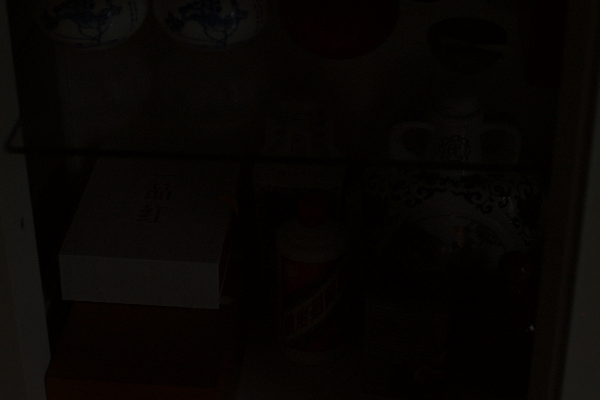

In [ ]:
#Original Image
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
img=cv2.imread('46.png')
cv2_imshow(img)

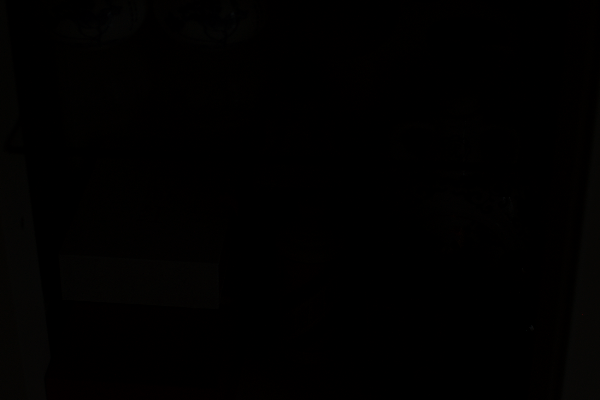

In [ ]:
#Gamma Transform

def gamma_correction_color(image, gamma=1.0):
    lookup_table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    corrected_channels = []
    for i in range(3):
        corrected_channel = cv2.LUT(image[:, :, i], lookup_table)
        corrected_channels.append(corrected_channel)

    corrected_image = cv2.merge(corrected_channels)

    return corrected_image

image = cv2.imread('46.png')
gamma_value = 1.5

enhanced_image = gamma_correction_color(image, gamma_value)

cv2_imshow(enhanced_image)


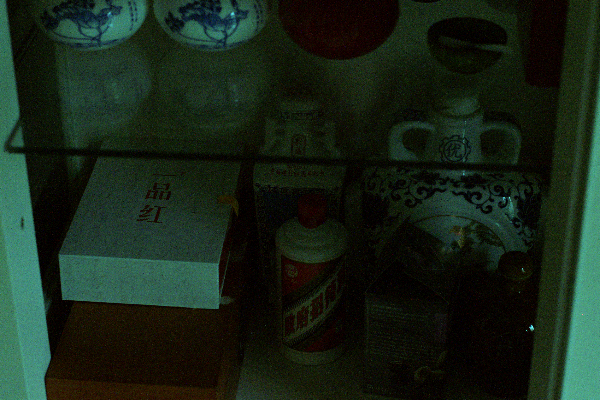

In [ ]:
# CONTRAST STRETCHING
def contrast_stretching_color(image):
    min_vals = np.min(image, axis=(0, 1))
    max_vals = np.max(image, axis=(0, 1))

    stretched_channels = []
    for i in range(3):
        stretched_channel = ((image[:, :, i] - min_vals[i]) / (max_vals[i] - min_vals[i])) * 255
        stretched_channel = np.uint8(stretched_channel)
        stretched_channels.append(stretched_channel)

    stretched_image = cv2.merge(stretched_channels)

    return stretched_image

image = cv2.imread('46.png')
enhanced_image = contrast_stretching_color(image)
cv2_imshow(enhanced_image)


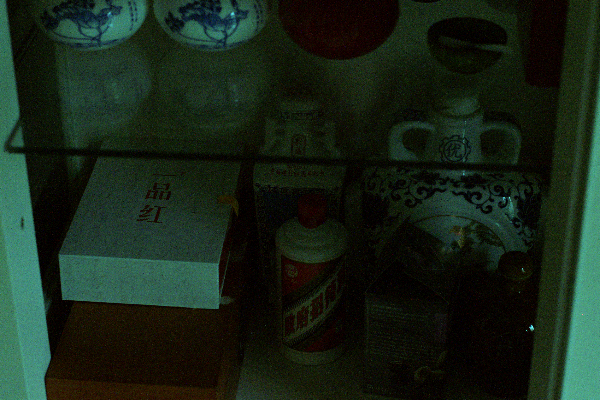

In [ ]:
#Linear gray transform
def linear_gray_transformation_color(image):
    min_vals = np.min(image, axis=(0, 1))
    max_vals = np.max(image, axis=(0, 1))

    transformed_channels = []
    for i in range(3):
        transformed_channel = ((image[:, :, i] - min_vals[i]) / (max_vals[i] - min_vals[i])) * 255
        transformed_channel = np.uint8(transformed_channel)
        transformed_channels.append(transformed_channel)
    transformed_image = cv2.merge(transformed_channels)

    return transformed_image
image = cv2.imread('46.png')
enhanced_image = linear_gray_transformation_color(image)
cv2_imshow(enhanced_image)


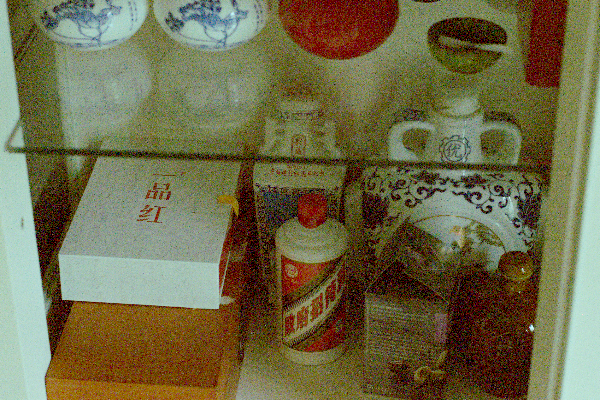

In [ ]:
#Logrithmic transform
def logarithmic_transformation_color(image):
    min_vals = np.min(image, axis=(0, 1))
    max_vals = np.max(image, axis=(0, 1))

    transformed_channels = []
    for i in range(3):
        transformed_channel = (np.log1p(image[:, :, i]) / np.log1p(max_vals[i])) * 255
        transformed_channel = np.uint8(transformed_channel)
        transformed_channels.append(transformed_channel)

    transformed_image = cv2.merge(transformed_channels)

    return transformed_image

image = cv2.imread('46.png')
enhanced_image = logarithmic_transformation_color(image)

cv2_imshow(enhanced_image)


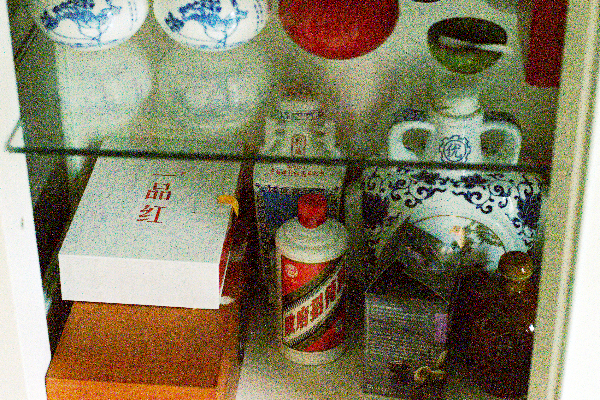

In [ ]:
#Histogram Equalization
def histogram_equalization_color(image):
    b, g, r = cv2.split(image)
    b_equalized = cv2.equalizeHist(b)
    g_equalized = cv2.equalizeHist(g)
    r_equalized = cv2.equalizeHist(r)
    equalized_image = cv2.merge((b_equalized, g_equalized, r_equalized))

    return equalized_image

image = cv2.imread('46.png')
# image = cv2.imread('sampleHarsbe.jpg')

equalized_image = histogram_equalization_color(image)

cv2_imshow(equalized_image)


In [ ]:
! pip install huggingface_hub

In [ ]:
import numpy as np
from huggingface_hub import from_pretrained_keras
import keras
from PIL import Image

In [ ]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

demo.png:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

model.png:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

(…)fevents.1645063719.e472ca747184.299.0.v2:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

(…)fevents.1645062781.9310af7fd322.357.0.v2:   0%|          | 0.00/481k [00:00<?, ?B/s]

(…)fevents.1645063841.e472ca747184.299.1.v2:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

variables/variables.index:   0%|          | 0.00/219k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/437M [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

In [ ]:

low_light_img = Image.open('mam_lowlightimage.jpg').convert('RGB')

In [ ]:
low_light_img = low_light_img.resize((512,512),Image.NEAREST)

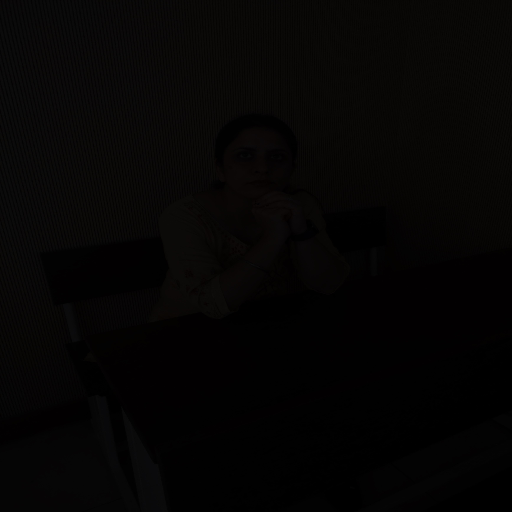

In [ ]:
low_light_img

In [ ]:
image = keras.preprocessing.image.img_to_array(low_light_img)

In [ ]:
image.shape

(512, 512, 3)

In [ ]:
image = image.astype('float32') / 255.0

In [ ]:
image.shape

(512, 512, 3)

In [ ]:
image = np.expand_dims(image, axis = 0)

In [ ]:
image.shape

(1, 512, 512, 3)

In [ ]:
output = model.predict(image) # model inference to enhance the low light pics

1/1 [==============================] - 65s 65s/step


In [ ]:
output_image = output[0] * 255.0

In [ ]:
output_image.shape

(512, 512, 3)

In [ ]:
output_image = output_image.clip(0,255)

In [ ]:
output_image.shape

(512, 512, 3)

In [ ]:
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

In [ ]:
output_image

array([[[ 71.701935,  75.84512 ,  62.959187],
        [ 91.36465 ,  86.239365,  77.25646 ],
        [101.99529 , 112.91738 ,  98.3634  ],
        ...,
        [113.56415 , 107.26943 , 101.923546],
        [ 96.65854 ,  89.55559 ,  78.96635 ],
        [ 74.233116,  69.378975,  69.43725 ]],

       [[ 86.75196 ,  90.58331 ,  86.56459 ],
        [108.93496 ,  98.90257 ,  92.66864 ],
        [121.728455, 126.13844 , 110.60986 ],
        ...,
        [129.31142 , 125.75433 , 113.88336 ],
        [121.779686, 116.14858 ,  97.66412 ],
        [102.84097 ,  90.67908 ,  86.36286 ]],

       [[ 98.070114,  95.55223 ,  97.56245 ],
        [121.5456  , 108.814125, 100.318146],
        [138.3788  , 136.0369  , 117.52858 ],
        ...,
        [140.5829  , 134.08243 , 119.16416 ],
        [132.6302  , 124.41719 , 103.75539 ],
        [117.18499 , 105.003586,  93.396805]],

       ...,

       [[ 89.84994 ,  92.17739 ,  85.55399 ],
        [113.07707 , 108.37905 , 100.47083 ],
        [123.10208 , 1

In [ ]:
output_image = np.uint32(output_image)

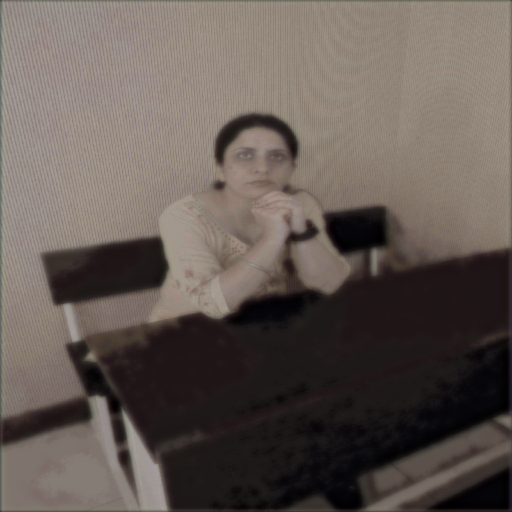

In [ ]:
Image.fromarray(output_image.astype('uint8'),'RGB')